# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('data/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [68]:
df.isnull().sum()
# пропусков нет

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [69]:
#ваш код 

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [70]:
X = np.array(df[['TV', 'radio', 'newspaper']])
y = np.array(df['sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [71]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [72]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



In [73]:
num_iters = 1000
m = 200
n = 4
w = np.zeros(4).reshape(4,1)

In [74]:

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))


Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [75]:
print(f'функция потерь {cost.round(3)}')
print(f'веса в модели линейной регрессии {list(round(float(x),6) for x in w)}')

функция потерь [2.784]
веса в модели линейной регрессии [41.562172, 110.131442, 73.528606, -0.550064]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [76]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [77]:
X = np.array(df[['TV', 'radio', 'newspaper']])
y = np.array(df['sales'])
X = (X - X.mean()) / X.std()

**Добавим единичный столбец**

In [78]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [79]:
def mse_error(y, y_pred):
    return float(sum((y-y_pred)**2)/len(y))

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [80]:
y_pred = np.full(len(y), y.mean())
naiv = mse_error(y, y_pred)
print(f'среднеквадратичная ошибка предсказания средним значением: {round(naiv,3)}')

среднеквадратичная ошибка предсказания средним значением: 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [81]:
def lin_pred(X, w):
    y_pred = X@w
    return y_pred[:,0]

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [82]:
def stoch_grad_step(X, y, w, train_ind, eta=0.01):
    line = X[train_ind, :]
    y_pred = X@w
    direction = []
    for i in range(len(line)):
        direction.append(2*(line[i]*(y_pred[train_ind] - y[train_ind]))/len(y))
    direction = np.array(direction).reshape(len(line),1)
    return w - direction*eta

print(stoch_grad_step(X, y, w, 0, eta=0.01))

[[ 41.53961086]
 [110.08348573]
 [ 73.53717585]
 [ -0.55072419]]


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм следующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [83]:
def stochastic_gradient_descent(X, y, w, eta=0.01, max_iter= 10000, stop_dist=0.000000001):
    error = []
    iter_num = 0
    w_dist = np.inf
    w = np.array(w).reshape(4,1)
    np.random.seed(42)
    while w_dist > stop_dist and iter_num < max_iter:
        rand_index = np.random.randint(len(y))
        new_w = stoch_grad_step(X, y, w, rand_index, eta)
        w_dist = np.linalg.norm(new_w - w)
        y_pred = lin_pred(X, w)
        error.append(mse_error(y, y_pred))
        w = new_w
        iter_num+=1
    return w, error

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

<AxesSubplot: >

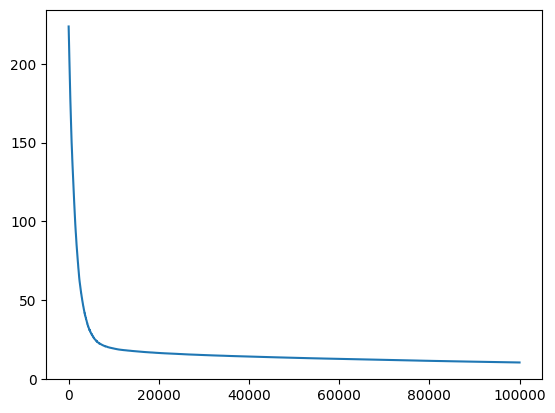

In [84]:
w_stoch, iter_error = stochastic_gradient_descent(X,y, w=(np.zeros(4)), max_iter=100000)
import seaborn as sns
sns.lineplot(x = range(len(iter_error)), y = iter_error)

**Выведите вектор весов, к которому сошелся метод.**

In [85]:
print(f'вектор весов, к которому сошелся метод {w_stoch.T}')

вектор весов, к которому сошелся метод [[ 9.62817808  3.94826048  0.52805324 -0.61627112]]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [86]:
print(f'среднеквадратичная ошибка на последней итерации {round(iter_error[-1],3)}')

среднеквадратичная ошибка на последней итерации 10.499
